In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from predictor import ChurnPredictor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictor = ChurnPredictor()
dataset = predictor.dataset

logistic_model = predictor.logistic_model
logistic_model.plot = True

x = dataset.loc[:, dataset.columns != 'Churn']
y = dataset['Churn']

In [3]:
# Split test and train data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,
)

In [4]:
scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

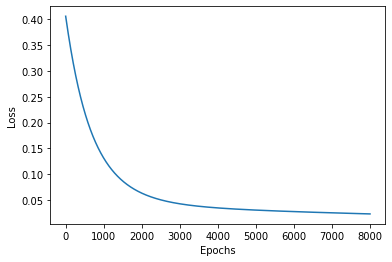

In [5]:
# Fit model and calculate time
scratch_logistic_model_time_start = time.time()
logistic_model.fit(x_train, y_train)
scratch_logistic_model_time_end = time.time()
scratch_logistic_model_time = scratch_logistic_model_time_end - scratch_logistic_model_time_start

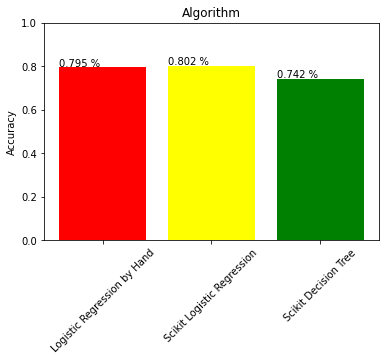

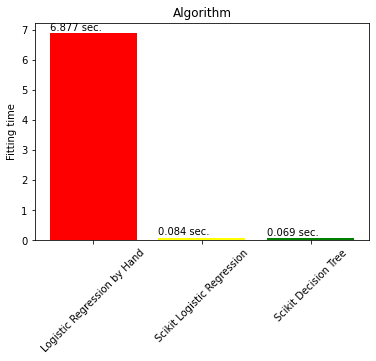

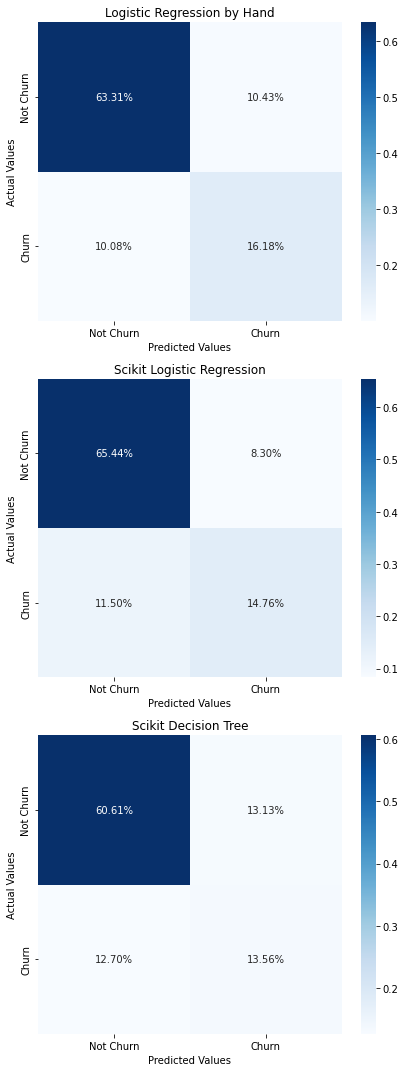

In [9]:
# Compare with other models
OTHER_MODELS = [
    predictor.scikit_logistic_regression_model,
    predictor.scikit_decision_tree,
]
LABELS = [
    "Logistic Regression by Hand",
    "Scikit Logistic Regression",
    "Scikit Decision Tree"
]
accuracy = []
times = []
confusion_marixes = [] 

predictions = logistic_model.predict(x_test)
accuracy.append(predictor.accuracy(y_test, predictions))
times.append(scratch_logistic_model_time)
confusion_marixes.append(confusion_matrix(y_test, predictions))

# Get accuracy of each model
for model in OTHER_MODELS:
    time_start = time.time()
    model.fit(x_train, y_train)
    time_result = time.time() - time_start
    times.append(time_result)
    predictions = model.predict(x_test)
    accuracy.append(predictor.accuracy(y_test, predictions))
    confusion_marixes.append(confusion_matrix(y_test, predictions))


my_colors = ['red', 'yellow', 'green', 'blue', 'orange']

bars = plt.bar(LABELS, accuracy, align='center', color=my_colors)
plt.ylabel('Accuracy')
plt.title('Algorithm')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_ylim([0,1])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.005, f"{yval:.3f} %")
plt.show()

bars = plt.bar(LABELS, times, align='center', color=my_colors)
plt.ylabel('Fitting time')
plt.title('Algorithm')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.1, f"{yval:.3f} sec.")
plt.show()

fig = plt.figure(figsize=(6, 15))
i = 0
for confusion in confusion_marixes:
    axes = fig.add_subplot(3, 1, i + 1)
    axes.set_title(LABELS[i])


    sns.heatmap(confusion / np.sum(confusion), annot=True, cmap='Blues', fmt='.2%', ax=axes)
    axes.set_xlabel('Predicted Values')
    axes.set_ylabel('Actual Values')
    axes.xaxis.set_ticklabels(['Not Churn','Churn'])
    axes.yaxis.set_ticklabels(['Not Churn','Churn'])
    i = i + 1

fig.tight_layout()
plt.show()


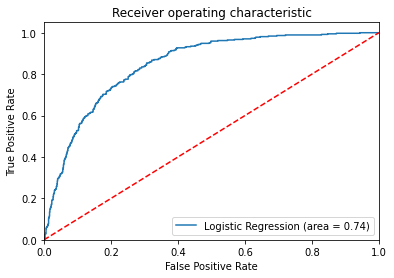

In [7]:
'''
 ROC Plotting Tutorial Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
'''

roc_logistic_scratch = roc_auc_score(y_test, logistic_model.predict(x_test))

fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_probabilities(x_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_logistic_scratch)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()